In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target
num_classes = 10  # Replace with the actual number of classes


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
class NaiveBayesClassifier:
    def _init_(self):
        self.class_prior_probabilities = None
        self.likelihood_probabilities = None

    def fit(self, X_train, y_train):
        num_samples, num_features = X_train.shape
        unique_classes, class_counts = np.unique(y_train, return_counts=True)
        self.class_prior_probabilities = class_counts / num_samples
        self.likelihood_probabilities = np.zeros((len(unique_classes), num_features, 16))
        
        for cls in unique_classes:
            class_samples = X_train[y_train == cls]
            for feature in range(num_features):
                for value in range(16):
                    self.likelihood_probabilities[cls, feature, value] = np.sum(class_samples[:, feature] == value) / len(class_samples)

    def predict(self, X_test):
        num_samples, num_features = X_test.shape
        predictions = np.zeros(num_samples, dtype=int)
        
        for i in range(num_samples):
            posterior_probabilities = np.zeros(len(self.class_prior_probabilities))
            for cls in range(len(self.class_prior_probabilities)):
                likelihood = 1
                for feature in range(num_features):
                    pixel_value = int(X_test[i, feature])
                    pixel_value = max(0, min(15, pixel_value))  # Clip pixel value between 0 and 15
                    likelihood *= self.likelihood_probabilities[cls, feature, pixel_value]
                posterior_probabilities[cls] = self.class_prior_probabilities[cls] * likelihood
            predictions[i] = np.argmax(posterior_probabilities)
        
        return predictions

In [43]:
# Instantiate the classifier
clf = NaiveBayesClassifier()

# Train the classifier
clf.fit(X_train, y_train)

In [44]:
# Predict on test data
y_pred = clf.predict(X_test)

In [45]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7027777777777777


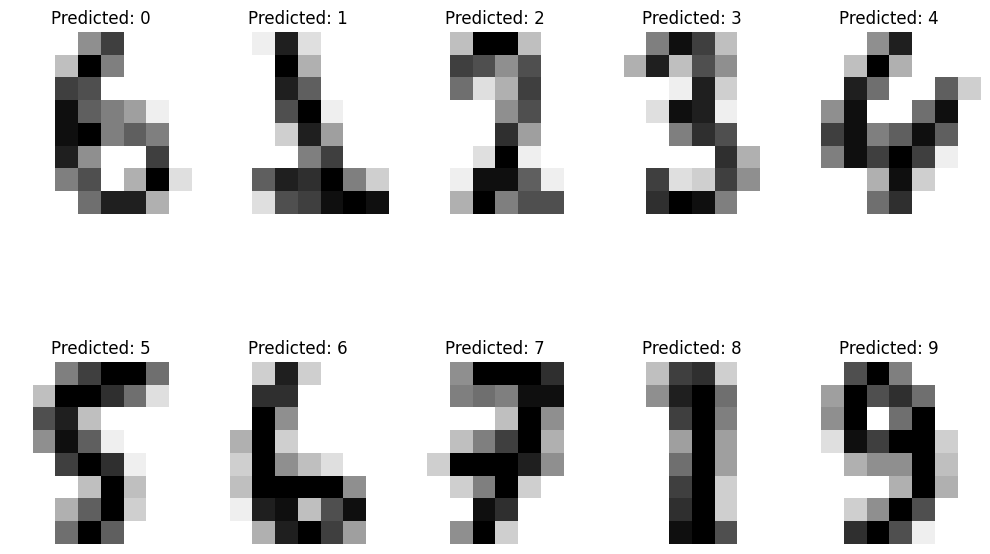

In [49]:
# Plot classifications
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[y_pred == i][0].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()